# 07 PCA/EOF analysis demo

UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean, Eric Gagliano, Quinn Brencher

## Overview

[PCA/EOF analysis](https://climatedataguide.ucar.edu/climate-tools/empirical-orthogonal-function-eof-analysis-and-rotated-eof-analysis) is great way to analyze variability in time series data. We will be using EOFs on the ERA5 anomaly data from this weeks lab in order to analyze climate modes. [Here](https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week7/eofs.html) is an explainer on EOF analyis as it relates to climate data. We will be using [xeofs](https://xeofs.readthedocs.io/en/latest/index.html), a package for xarray PCA analysis Check out the [xeofs example gallery](https://xeofs.readthedocs.io/en/latest/content/user_guide/auto_examples/index.html) for the different types of analysis.

Additional examples of PCA/SVD/EOFs with different packages
- [Example with eofs](https://python.nicolasbarrier.fr/misc/eof_analysis.html)
- [Example with SVD function in scipy](https://mountain-hydrology-research-group.github.io/data-analysis/modules/module8/lab8-1.html)
- [Example with PCA function in scikit-learn](https://knowledge.dea.ga.gov.au/notebooks/How_to_guides/Principal_component_analysis/)

For more comprehensive details on EOF analysis as it relates to climate data, check out [A Primer for EOF Analysis of Climate Data](https://civil.colorado.edu/~balajir/CVEN6833/lectures/eofprimer.pdf).

In [1]:
#!pip install xeofs
from pathlib import Path
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import os
import xeofs

## Read in data, coarsen, and reproject

In [2]:
era5_data_dir = f'{Path.home()}/gda_demo_data/era5_data'
anom_fn = os.path.join(era5_data_dir, '1month_anomaly_Global_ea_2t.nc') 
anom_ds = xr.open_dataset(anom_fn, chunks='auto')

In [3]:
# anom_ds = anom_ds.resample(time='YE').mean()
# anom_ds

In [4]:
def ds_swaplon(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

anom_ds = ds_swaplon(anom_ds)

anom_ds.rio.write_crs('EPSG:4326', inplace=True);
anom_ds

<xarray.Dataset> Size: 2GB
Dimensions:      (time: 517, latitude: 721, longitude: 1440)
Coordinates:
  * time         (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2022-01-01
  * latitude     (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude    (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    spatial_ref  int64 8B 0
Data variables:
    t2m          (time, latitude, longitude) float32 2GB dask.array<chunksize=(205, 286, 480), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-28T07:59 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
anom_ds = anom_ds.coarsen(latitude=2, longitude=4, boundary='trim').mean()
anom_ds

<xarray.Dataset> Size: 268MB
Dimensions:      (time: 517, latitude: 360, longitude: 360)
Coordinates:
  * time         (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2022-01-01
  * latitude     (latitude) float64 3kB 89.88 89.38 88.88 ... -89.12 -89.62
  * longitude    (longitude) float64 3kB -179.6 -178.6 -177.6 ... 178.4 179.4
    spatial_ref  int64 8B 0
Data variables:
    t2m          (time, latitude, longitude) float32 268MB dask.array<chunksize=(205, 143, 120), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-28T07:59 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
ea_proj = '+proj=moll'

anom_da = anom_ds['t2m'].rio.reproject(ea_proj)
anom_da

<xarray.DataArray 't2m' (time: 517, y: 228, x: 455)> Size: 215MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 4kB -1.8e+07 -1.792e+07 ... 1.789e+07 1.797e+07
  * y            (y) float64 2kB 8.981e+06 8.902e+06 ... -8.847e+06 -8.926e+06
  * time         (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2022-01-01
    spatial_ref  int64 8B 0
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

## Now try performing the EOF analysis...

In [7]:
eof = xeofs.single.EOF(n_modes=10)
eof.fit(anom_da, dim="time")
eof.explained_variance_ratio()
components = eof.components() 
scores = eof.scores()

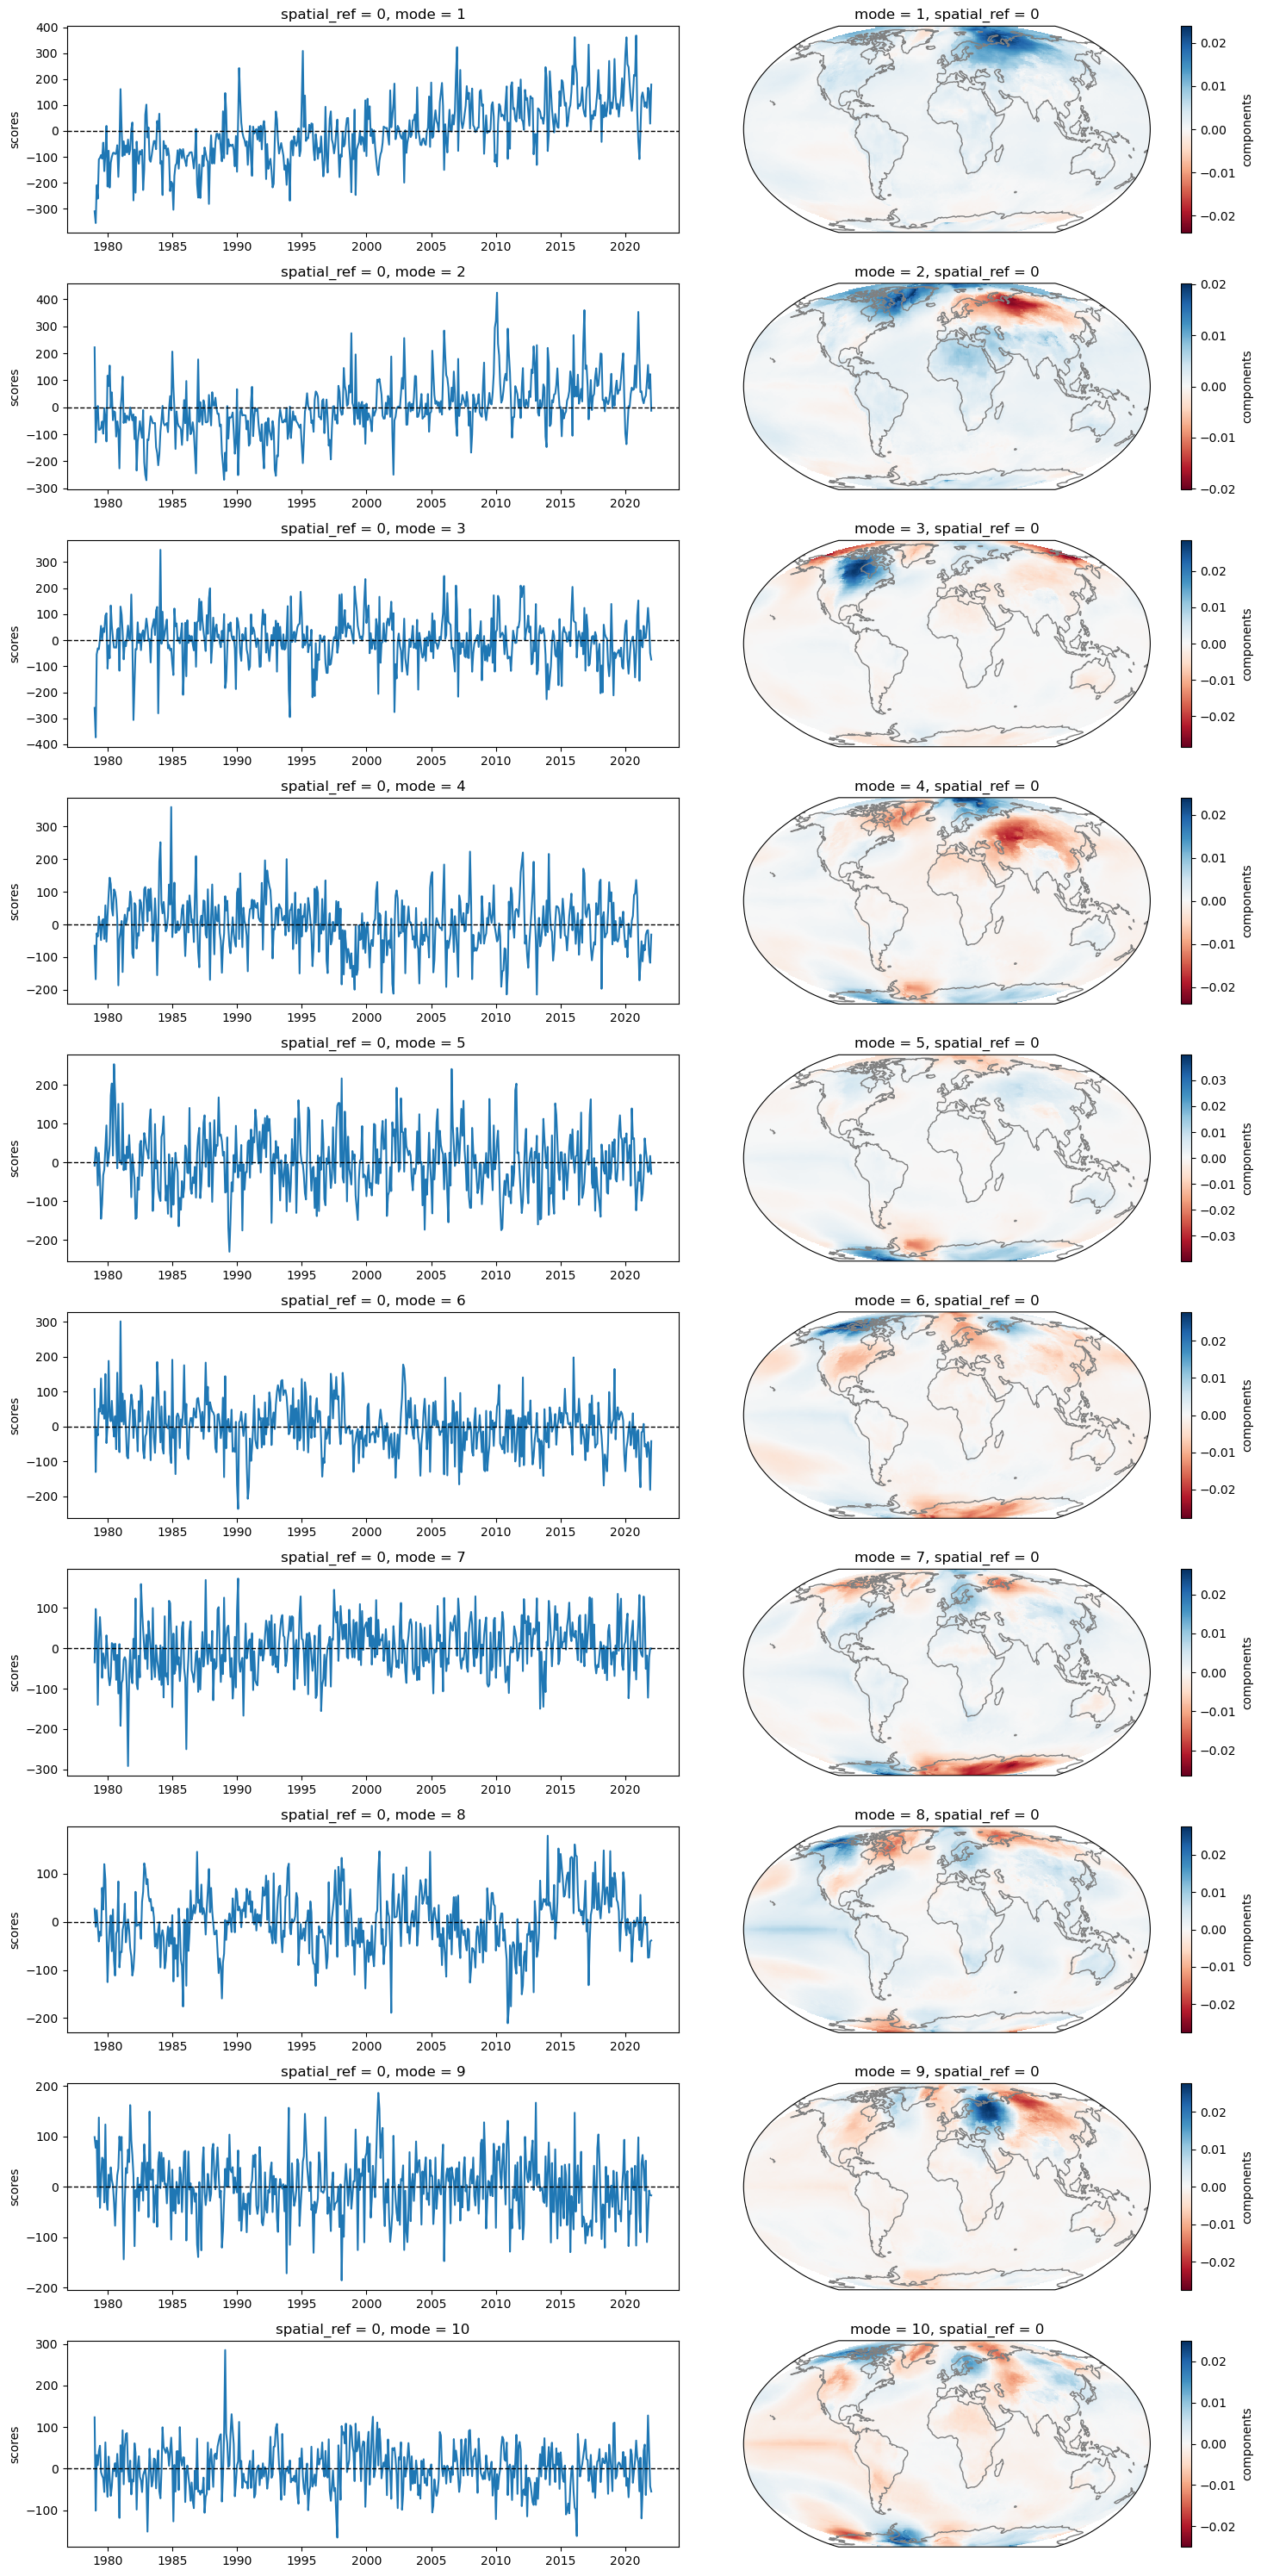

In [8]:
n = len(scores.mode)

kwargs = {"cmap": "RdBu"}#, "vmin": -0.05, "vmax": 0.05}

f = plt.figure(figsize=(15, 3*n))
gs = GridSpec(n, 2, width_ratios=[2, 2])
ax0 = [f.add_subplot(gs[i, 0]) for i in range(n)]
ax1 = [f.add_subplot(gs[i, 1], projection=ccrs.Robinson()) for i in range(n)]

for i, (a0, a1) in enumerate(zip(ax0, ax1)):
    scores.sel(mode=i + 1).plot(ax=a0)
    a0.axhline(0, color="k", linestyle='--', lw=1)
    a1.coastlines(color=".5")
    components.sel(mode=i + 1).plot(ax=a1, **kwargs)

    a0.set_xlabel("")

f.tight_layout()

## Whooops, looks like the leading pattern is dominated by the global warming signal! Let's [subtract out this trend with extended EOF analysis](https://xeofs.readthedocs.io/en/latest/content/user_guide/auto_examples/1single/plot_eeof_trend.html)...

In [9]:
# Could also try to remove the linear trend from the data before running the EOF analysis, though this assumes the trend is linear
# polyfit_coeffs_da = anom_da.polyfit(deg=1,dim='time')['polyfit_coefficients']
# anom_polyfit_da = xr.polyval(anom_da.time, polyfit_coeffs_da)
# anom_da = anom_da - anom_polyfit_da
# anom_da

# eof = xeofs.single.EOF(n_modes=10)
# eof.fit(anom_da, dim="time")
# eof.explained_variance_ratio()
# components = eof.components() 
# scores = eof.scores()

In [10]:
eeof = xeofs.single.ExtendedEOF(n_modes=5, tau=1, embedding=120, n_pca_modes=50)
eeof.fit(anom_da, dim="time")
components_ext = eeof.components()
scores_ext = eeof.scores()

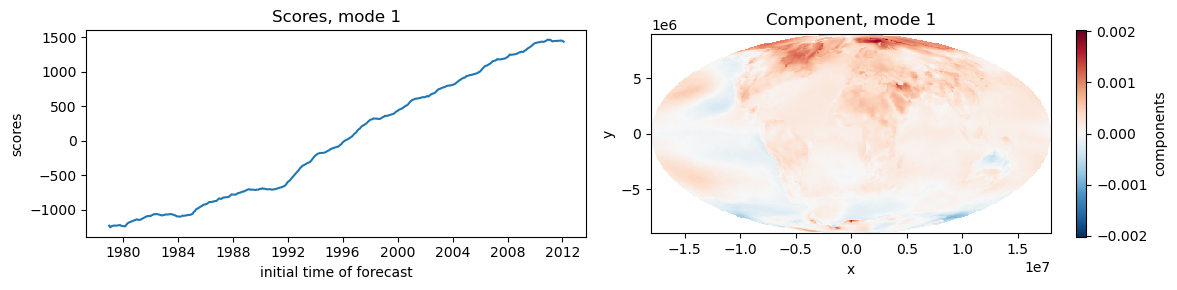

In [18]:
f, axs = plt.subplots(1, 2, figsize=(12, 3))
scores_ext.sel(mode=1).plot(ax=axs[0])
components_ext.sel(mode=1, embedding=0).plot(ax=axs[1])
axs[1].set_aspect('equal')

axs[0].set_title("Scores, mode 1")
axs[1].set_title("Component, mode 1")

f.tight_layout()


In [12]:
anom_trends_da = eeof.inverse_transform(scores_ext.sel(mode=1))
anom_detrended_da = anom_da - anom_trends_da
anom_detrended_da

<xarray.DataArray (time: 517, y: 228, x: 455)> Size: 429MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x            (x) float64 4kB -1.8e+07 -1.792e+07 ... 1.789e+07 1.797e+07
  * y            (y) float64 2kB 8.981e+06 8.902e+06 ... -8.847e+06 -8.926e+06
  * time         (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2022-01-01
    spatial_ref  int64 8B 0
Attributes: (12/30)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown

## Now we can run the EOF analysis again on the detrended data...

In [13]:
eof_model_detrended = xeofs.single.EOF(n_modes=10)
eof_model_detrended.fit(anom_detrended_da, dim="time")
scores_detrended = eof_model_detrended.scores()
components_detrended = eof_model_detrended.components()

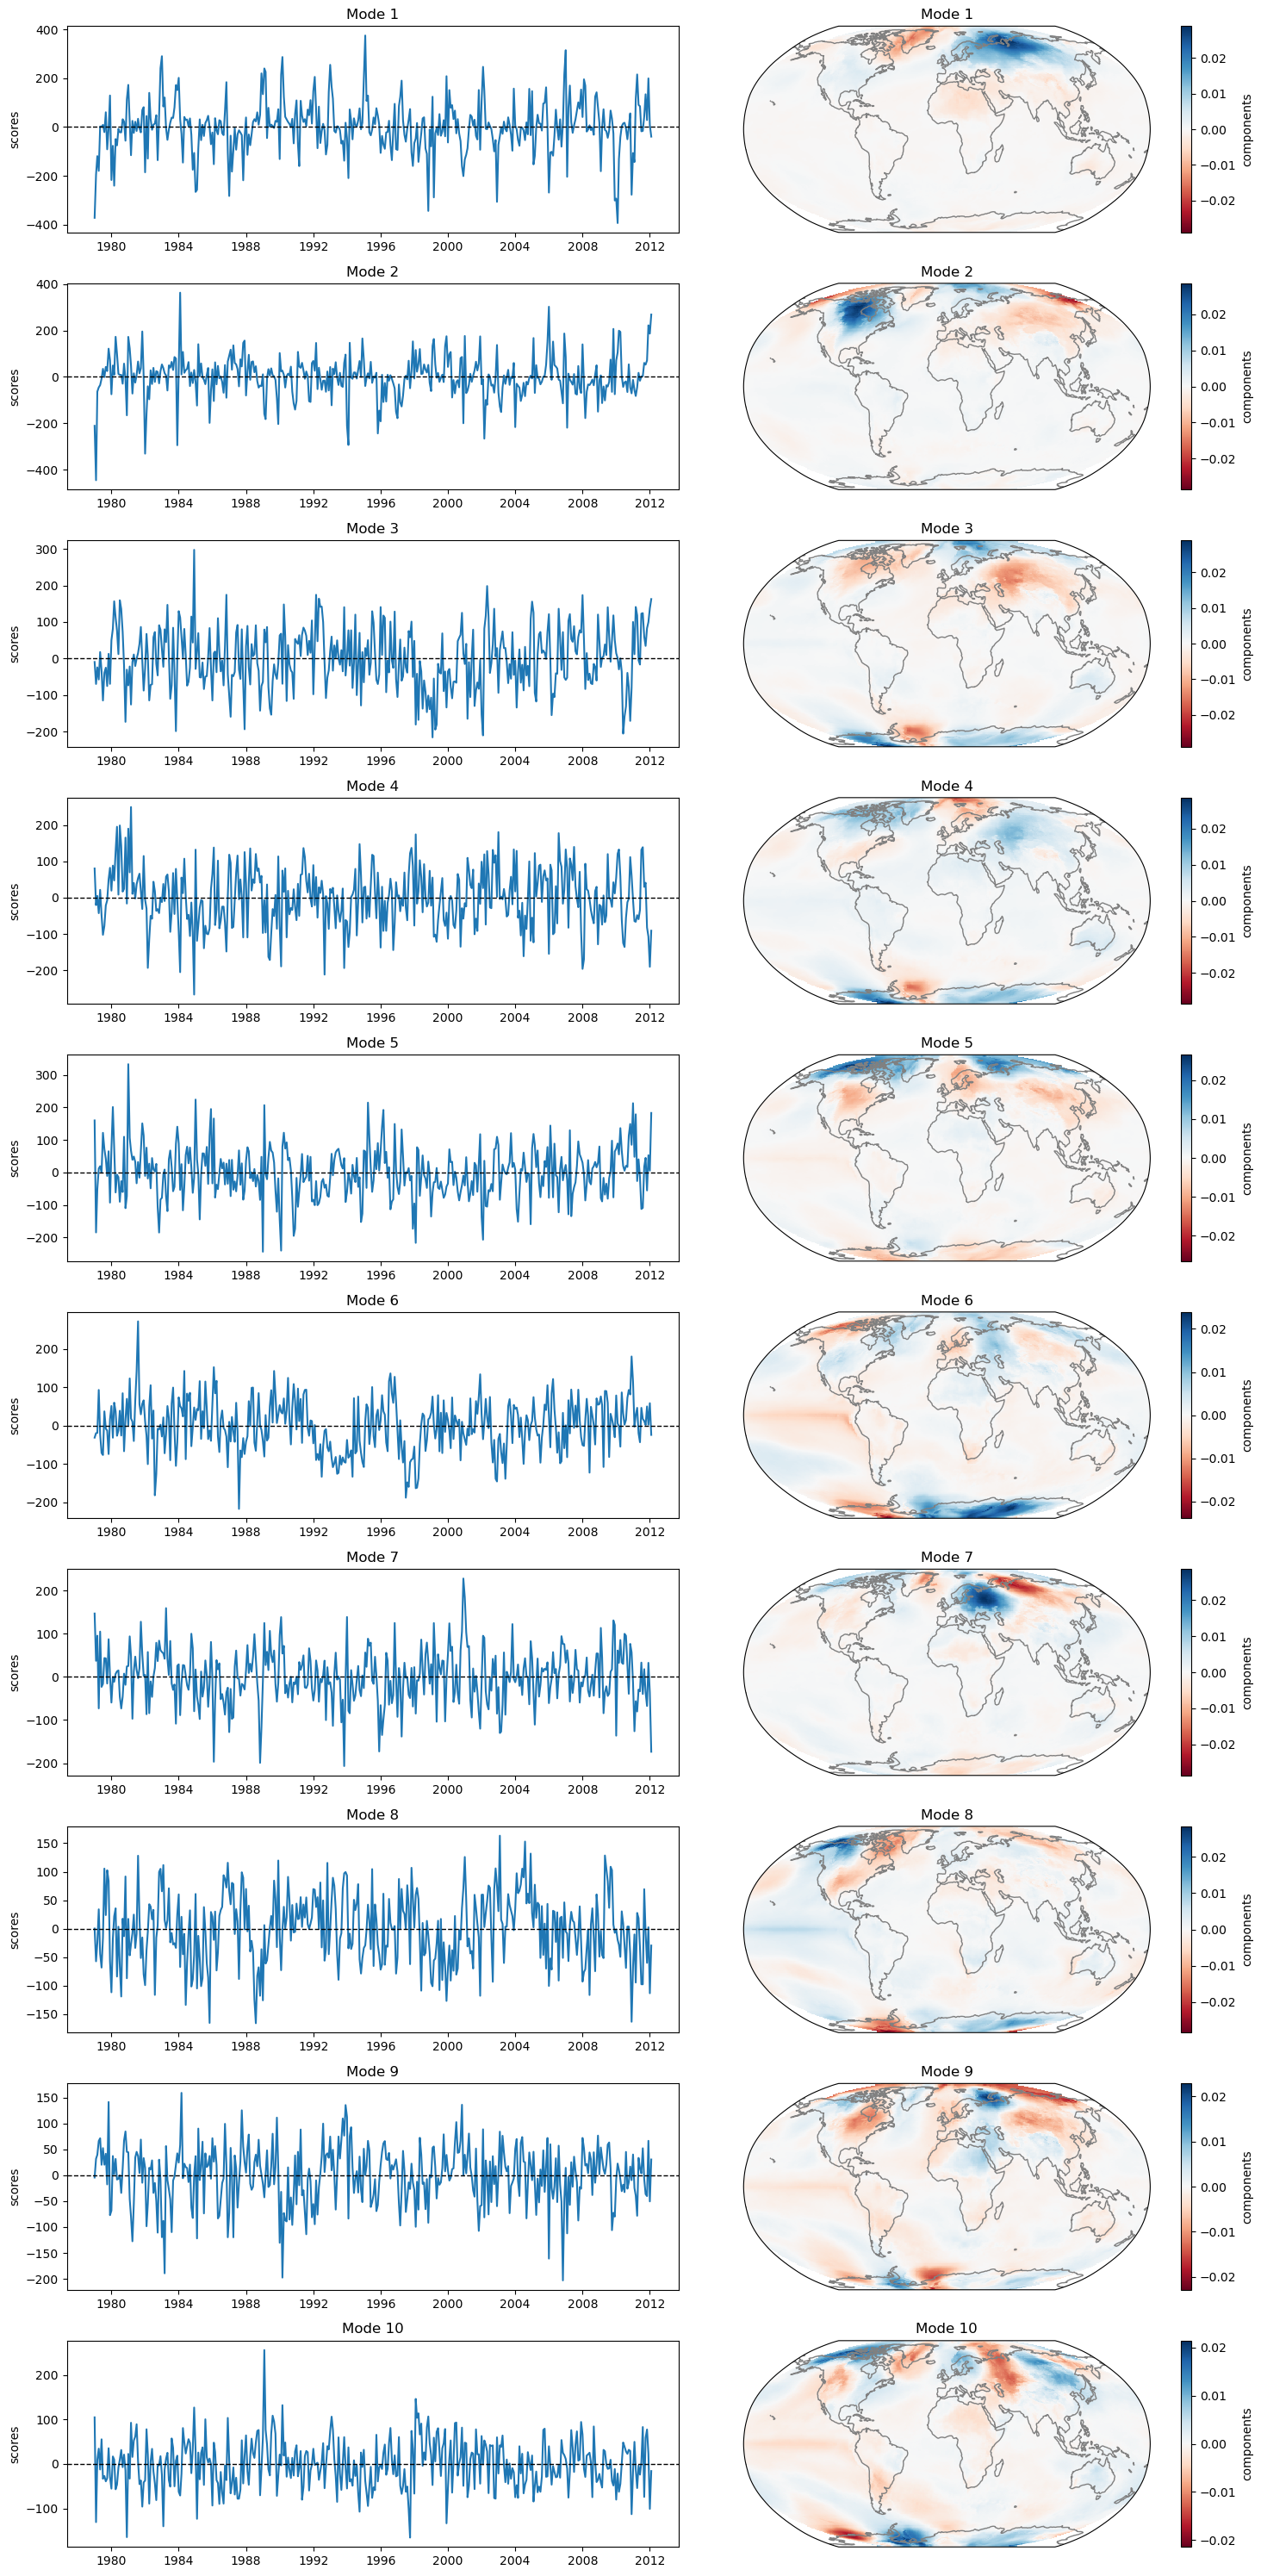

In [14]:
n = len(scores_detrended.mode)

kwargs = {"cmap": "RdBu"}#, "vmin": -0.05, "vmax": 0.05}

f = plt.figure(figsize=(15, 3*n))
gs = GridSpec(n, 2, width_ratios=[2, 2])
ax0 = [f.add_subplot(gs[i, 0]) for i in range(n)]
ax1 = [f.add_subplot(gs[i, 1], projection=ccrs.Robinson()) for i in range(n)]

for i, (a0, a1) in enumerate(zip(ax0, ax1)):
    scores_detrended.sel(mode=i + 1).plot(ax=a0)
    a0.axhline(0, color="k", linestyle='--', lw=1)
    a1.coastlines(color=".5")
    components_detrended.sel(mode=i + 1).plot(ax=a1, **kwargs)

    a0.set_title(f"Mode {i + 1}")
    a1.set_title(f"Mode {i + 1}")
    a0.set_xlabel("")

f.tight_layout()

### Interpretation! Based on your understanding of the reading, what do the plots on the left hand side represent? What about the right hand side? Comment on any interpretable patterns.